In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
print(tf.__version__)

2.1.0


- Auto MPG Dataset

In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\kim23\\.keras\\datasets\\auto-mpg.data'

In [4]:
columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower', 'weight' , 'acceleration', 'model year', 'origin' ]

raw_dataset = pd.read_csv(dataset_path,names=columns,sep=' ',comment='\t',skipinitialspace=True)
raw_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
dataset = raw_dataset.copy()
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1
397,31.0,4,119.0,82.00,2720.0,19.4,82,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [7]:
dataset['origin'].unique()

array([1, 3, 2], dtype=int64)

In [8]:
dataset['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
# 데이터 정제
# 결측값 확인
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [10]:
dataset['horsepower'].replace('?',np.nan,inplace=True)

In [11]:
dataset['horsepower'] = dataset['horsepower'].astype(float)

In [12]:
dataset['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [13]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [14]:
# 결측값제거
dataset = dataset.dropna()

In [15]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [16]:
# one-hot-encoding
# origin은 수치형이 아니고 범주형이므로 원-핫 인코딩을 통한 변환이 필요하다.
# 1 -> usa, 2 -> europe, 3->korea

origin = dataset.pop('origin')# 열을 꺼내고 삭제
dataset['usa'] = (origin==1) * 1.0
dataset['europe'] = (origin==2) * 2.0
dataset['korea'] = (origin==3) * 3.0


In [17]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,usa,europe,korea
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [18]:
# 세트분할
train_set = dataset.sample(frac=.8,random_state=0)
print(len(train_set))
test_set = dataset.drop(train_set.index)
print(len(test_set))

314
78


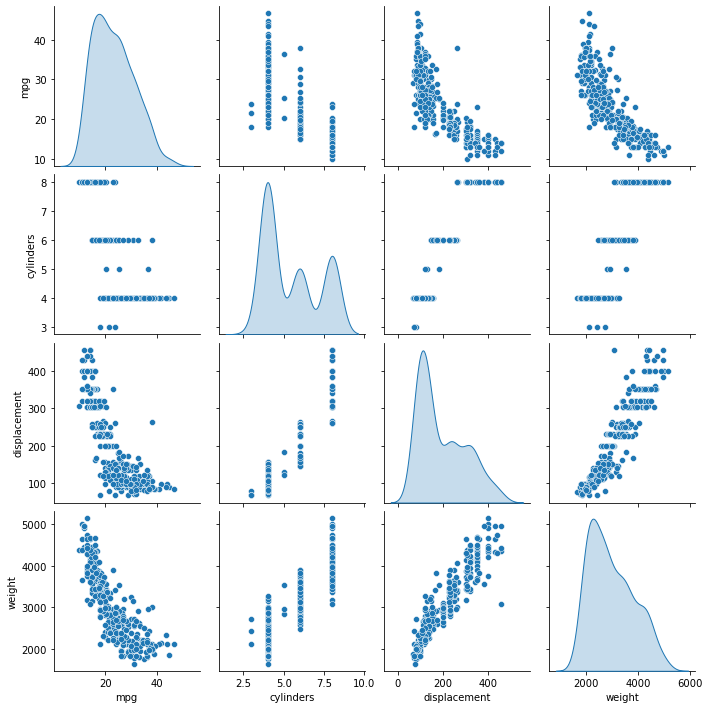

In [19]:
sns.pairplot(train_set[['mpg','cylinders','displacement','weight']],diag_kind='kde')
# diag_kind='kde' density 분포를 그려준다

In [20]:
train_set.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,usa,europe,korea
146,28.0,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,38.0,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,33.8,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,3.0


In [21]:
train_stats = train_set.describe()
train_stats.pop('mpg')
train_stats=train_stats.transpose()

In [22]:
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
usa,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
europe,314.0,0.356688,0.766826,0.0,0.00,0.0,0.00,2.0
korea,314.0,0.592357,1.196135,0.0,0.00,0.0,0.00,3.0


In [23]:
y_train = train_set.pop('mpg')
y_test =test_set.pop('mpg')

In [24]:
# 데이터 표준화
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']

norm_train_set = norm(train_set)
norm_test_set = norm(test_set)

In [25]:
norm_test_set

,cylinders,displacement,horsepower,weight,acceleration,model year,usa,europe,korea
9,1.483887,1.865988,2.234620,1.018782,-2.530891,-1.604642,0.774676,-0.465148,-0.495225
25,1.483887,1.578444,2.890853,1.925289,-0.559020,-1.604642,0.774676,-0.465148,-0.495225
28,1.483887,1.041693,2.313368,2.063931,1.054328,-1.604642,0.774676,-0.465148,-0.495225
31,-0.869348,-0.789008,-0.259066,-0.903250,-0.559020,-1.332580,-1.286751,-0.465148,2.012852
33,0.307270,0.351586,-0.127819,-0.422150,-0.917542,-1.332580,0.774676,-0.465148,-0.495225
...,...,...,...,...,...,...,...,...,...
369,-0.869348,-0.798593,-0.442811,-0.705359,0.875068,1.660094,0.774676,-0.465148,-0.495225
375,-0.869348,-0.865687,-0.810302,-1.197124,-0.092942,1.660094,-1.286751,2.143005,-0.495225
382,-0.869348,-0.836932,-0.915299,-0.883106,0.480693,1.660094,-1.286751,-0.465148,2.012852
384,-0.869348,-0.999874,-0.994047,-1.214899,0.050467,1.660094,-1.286751,-0.465148,2.012852


In [26]:
# 모델만들기
model = keras.Sequential([
    layers.Dense(50,activation='relu',input_shape=[len(train_set.keys())]), # activation='relu' 회귀를 쓰겠다
    layers.Dense(50,activation='relu'),
    layers.Dense(1)
]) # 은닉계층들을 연결 시켜주는 역할

optimizer = tf.keras.optimizers.RMSprop()

# comile을 통해 학습
# loss function (손실 함수) -> 훈련하는 동안 모델의 오차를 측정한다
model.compile(loss='mse',
             optimizer=optimizer,
             metrics=['mae','mse'])

In [27]:
# mae -> 모델의 예측값과 실제값의 차이를 모두 더한다는 개념 
# 절대값을 취하기 때문에 가장 직관적으로 알 수 있는 지표이다

# mse -> 모델의 예측값과 실제값차이의 면적

In [28]:
model.summary()
# param - 연산..?

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


In [29]:
sample_result = model.predict(norm_train_set[:10])
sample_result

array([[-0.03031348],
       [-0.12825572],
       [ 0.18268248],
       [ 0.20609045],
       [-0.11197534],
       [-0.25655243],
       [-0.11958867],
       [ 0.55116147],
       [-0.12854119],
       [ 0.0077152 ]], dtype=float32)

In [30]:
# 모델학습
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
# 훈련정확도와 검증 정확도 : history
history = model.fit(norm_train_set, y_train, epochs=1000,validation_split=.2,verbose=0,callbacks=[PrintDot()])# 검증데이터를 0.2 정도 쓰겠다


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [31]:
hist = pd.DataFrame(history.history)
hist

,loss,mae,mse,val_loss,val_mae,val_mse
0,575.774365,22.709749,575.774353,574.625691,22.639277,574.625671
1,540.764226,21.931749,540.764282,540.057290,21.871206,540.057312
2,508.235059,21.195105,508.235046,503.504140,21.047281,503.504150
3,472.719341,20.383816,472.719299,462.836059,20.102663,462.836060
4,433.656648,19.453772,433.656647,417.798786,19.017086,417.798798
...,...,...,...,...,...,...
995,3.602668,1.215029,3.602668,8.382088,2.155462,8.382088
996,3.329867,1.191943,3.329867,8.839769,2.214752,8.839769
997,3.333787,1.188787,3.333787,8.543809,2.170149,8.543810
998,3.436227,1.210172,3.436227,8.972118,2.227450,8.972117


In [32]:
# 에측
loss,mae,mse=model.evaluate(norm_test_set,y_test,verbose=1) # verbose 디버깅
print('평균 절대 오차 : ', mae)

78/78 [==============================] - 0s 63us/sample - loss: 7.4021 - mae: 2.2181 - mse: 7.4021
평균 절대 오차 :  2.2181096


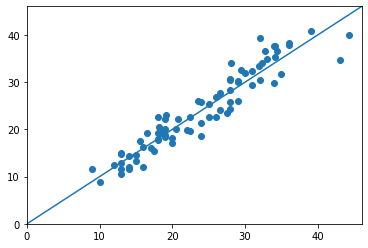

In [40]:
# 시각화 
import matplotlib.pyplot as plt

y_pred = model.predict(norm_test_set).flatten() # 1차원으로 변환
plt.scatter(y_test,y_pred)

plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])

_= plt.plot([-100,100],[-100,100])
plt.show()